In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math as m

In [3]:
df= pd.read_csv('S&P500_10.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,5/18/2009,886.070007,910.000000,886.070007,909.710022,5702150000
1,5/19/2009,909.669983,916.390015,905.219971,908.130005,6616270000
2,5/20/2009,908.619995,924.599976,901.369995,903.469971,8205060000
3,5/21/2009,900.419983,900.419983,879.609985,888.330017,6019840000
4,5/22/2009,888.679993,896.650024,883.750000,887.000000,5155320000


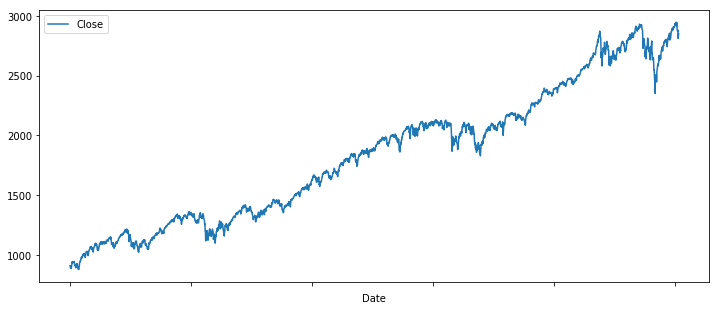

In [4]:
df.plot(x='Date', y='Close', figsize=(12,5))

In [4]:
# calculate the daily log returns
# calculate daily change

# daily log returns

daily_log_returns=[0]
for i in range(df.shape[0]-1):
    r_t= m.log10(df['Close'][i+1]/df['Close'][i])
    daily_log_returns.append(r_t)
df['Daily log returns']=daily_log_returns

# daily change

daily_change=[0]
for i in range(df.shape[0]-1):
    daily_change.append(df["Close"][i+1]-df["Close"][i])
    
df["Daily Change"]=daily_change

In [5]:
df["Daily Change"]

0        0.000000
1       -1.580017
2       -4.660034
3      -15.139954
4       -1.330017
5       23.330017
6      -17.270019
7       13.770019
8       12.309998
9       23.729980
10       1.869995
11     -12.979980
12      10.700012
13      -2.369995
14      -0.950012
15       3.289978
16      -3.279969
17       5.739991
18       1.320007
19     -22.490051
20     -11.750000
21      -1.259949
22       7.659973
23       2.859985
24     -28.190002
25       2.059998
26       5.840026
27      19.320008
28      -1.359986
29       8.329956
          ...    
2486     6.159912
2487     5.989991
2488    13.350097
2489     3.030030
2490   -17.570069
2491    10.010010
2492     0.110107
2493    19.089844
2494    -1.829834
2495     1.479981
2496    -6.610108
2497     4.580078
2498     2.939942
2499    25.709961
2500    -6.429932
2501    -1.080078
2502    13.709961
2503     3.150146
2504     2.800049
2505   -22.100098
2506    -6.209960
2507    28.119873
2508   -13.169922
2509   -48.419922
2510    -4

In [6]:
# calculate realized variance and realized volatility over 20 days

lst= df['Daily log returns']
squared= lst**2
realized_variance=[]
realized_volatility=[]

for i in range(df.shape[0]):
    sum_20= sum(squared[i:i+19])
    realized_variance.append(sum_20)
    
    rvol= m.sqrt(realized_variance[i])
    realized_volatility.append(rvol)

df['Realized Volatility']= pd.DataFrame(realized_volatility)

In [7]:
df.tail()

,Date,Open,High,Low,Close,Volume,Daily log returns,Daily Change,Realized Volatility
2511,5/9/2019,2859.840088,2875.969971,2836.399902,2870.719971,3638820000,-0.001314,-8.699951,0.011631
2512,5/10/2019,2863.100098,2891.310059,2825.389893,2881.399902,3529600000,0.001613,10.679931,0.011556
2513,5/13/2019,2840.189941,2840.189941,2801.429932,2811.870117,3894030000,-0.010608,-69.529785,0.011443
2514,5/14/2019,2820.120117,2852.540039,2820.120117,2834.409912,3322720000,0.003467,22.539795,0.004291
2515,5/15/2019,2820.379883,2858.679932,2815.080078,2850.959961,3125950000,0.002528,16.550049,0.002528


In [8]:
len(realized_volatility)

2516

In [9]:
# calculate realized volatility returns in percentage, (to magnify the values)

real_vol_percentage=[0]
for i in range(df.shape[0]-1):
    returns= (df['Realized Volatility'][i+1]- df['Realized Volatility'][i])/ (df['Realized Volatility'][i])
    real_vol_percentage.append(100*returns)
    
df['Realized Volatility Change_percentage']= real_vol_percentage

In [10]:
df.tail()

,Date,Open,High,Low,Close,Volume,Daily log returns,Daily Change,Realized Volatility,Realized Volatility Change_percentage
2511,5/9/2019,2859.840088,2875.969971,2836.399902,2870.719971,3638820000,-0.001314,-8.699951,0.011631,-0.179479
2512,5/10/2019,2863.100098,2891.310059,2825.389893,2881.399902,3529600000,0.001613,10.679931,0.011556,-0.640379
2513,5/13/2019,2840.189941,2840.189941,2801.429932,2811.870117,3894030000,-0.010608,-69.529785,0.011443,-0.978496
2514,5/14/2019,2820.120117,2852.540039,2820.120117,2834.409912,3322720000,0.003467,22.539795,0.004291,-62.499068
2515,5/15/2019,2820.379883,2858.679932,2815.080078,2850.959961,3125950000,0.002528,16.550049,0.002528,-41.080559


In [11]:
df['Realized Volatility Change_percentage'].max()

124.0629344938065

In [12]:
df['Realized Volatility Change_percentage'].min()

-62.499067871590974

In [13]:
df['Realized Volatility Change_percentage'].mean()

0.24600889267434406

Text(0.5, 1.0, 'percentage return')

<Figure size 864x360 with 0 Axes>

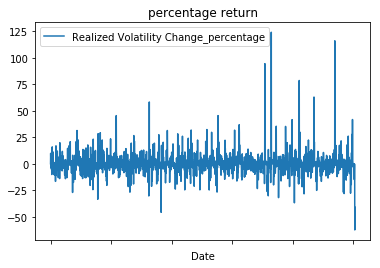

In [14]:
# plot the percentage change realized volatility

plt.figure(figsize=(12,5))
df.plot(x='Date', y='Realized Volatility Change_percentage')
plt.title('percentage return')

In [15]:
# define crash

V=7
def crash(x):
    if x>=V:
        return 1
    else:
        return 0
df['Crash']= df['Realized Volatility Change_percentage'].apply(crash)
    

In [16]:
df[df['Crash']==1].count()

Date                                     247
Open                                     247
High                                     247
Low                                      247
Close                                    247
Volume                                   247
Daily log returns                        247
Daily Change                             247
Realized Volatility                      247
Realized Volatility Change_percentage    247
Crash                                    247
dtype: int64

In [17]:
lst= df[df['Crash']==1].index
for i in lst:
    print(df.iloc[i]['Date'])

5/19/2009
6/8/2009
6/18/2009
7/22/2009
7/28/2009
8/6/2009
9/1/2009
9/4/2009
9/18/2009
10/5/2009
10/6/2009
10/14/2009
12/7/2009
12/23/2009
12/24/2009
1/8/2010
2/8/2010
3/9/2010
3/18/2010
3/22/2010
3/31/2010
4/6/2010
4/8/2010
4/12/2010
4/14/2010
4/26/2010
6/10/2010
6/21/2010
7/16/2010
8/6/2010
9/9/2010
9/23/2010
10/11/2010
10/21/2010
10/25/2010
10/28/2010
10/29/2010
11/4/2010
12/7/2010
12/16/2010
12/20/2010
12/22/2010
1/3/2011
1/5/2011
1/26/2011
2/4/2011
2/11/2011
2/17/2011
3/23/2011
3/25/2011
4/14/2011
5/5/2011
6/14/2011
6/30/2011
7/7/2011
7/11/2011
7/13/2011
7/14/2011
7/15/2011
7/18/2011
8/25/2011
8/26/2011
9/14/2011
10/14/2011
11/3/2011
11/23/2011
1/5/2012
1/9/2012
1/23/2012
2/8/2012
2/15/2012
2/29/2012
3/13/2012
3/16/2012
3/21/2012
4/23/2012
4/25/2012
5/3/2012
5/7/2012
5/10/2012
5/25/2012
6/5/2012
6/29/2012
7/10/2012
8/10/2012
8/17/2012
9/13/2012
9/20/2012
9/25/2012
9/27/2012
10/10/2012
11/21/2012
12/3/2012
12/4/2012
12/5/2012
1/7/2013
1/8/2013
1/9/2013
1/24/2013
1/29/2013
3/7/2013
3

In [18]:
# Exploratory Data analysis on crash like days

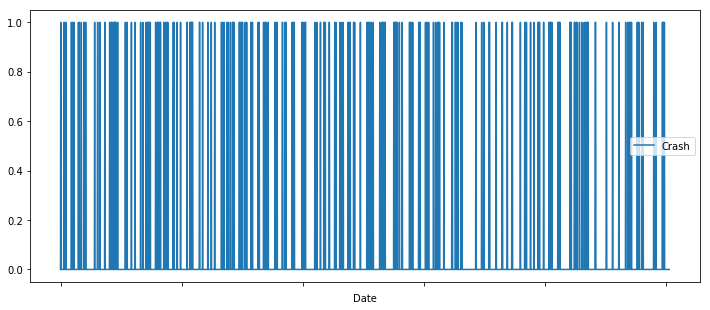

In [19]:
df.plot(x='Date', y='Crash', figsize=(12,5))

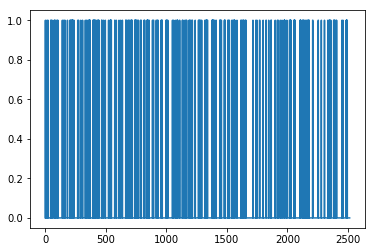

In [20]:
plt.plot(df['Crash'])

In [21]:
# create a new data frame with 20 consecutive days w.r.to daily change in price

columns=[]
for i in range(1,21):
    s= f"Daily Change {i}"
    i+=1
    columns.append(s)

newdf= pd.DataFrame(([df['Daily Change'][i+k] for k in range(20)] for i in range(df.shape[0]-19)), columns= columns)

In [22]:
newdf.tail()

,Daily Change 1,Daily Change 2,Daily Change 3,Daily Change 4,Daily Change 5,Daily Change 6,Daily Change 7,Daily Change 8,Daily Change 9,Daily Change 10,Daily Change 11,Daily Change 12,Daily Change 13,Daily Change 14,Daily Change 15,Daily Change 16,Daily Change 17,Daily Change 18,Daily Change 19,Daily Change 20
2492,0.110107,19.089844,-1.829834,1.479981,-6.610108,4.580078,2.939942,25.709961,-6.429932,-1.080078,13.709961,3.150146,2.800049,-22.100098,-6.209960,28.119873,-13.169922,-48.419922,-4.630127,-8.699951
2493,19.089844,-1.829834,1.479981,-6.610108,4.580078,2.939942,25.709961,-6.429932,-1.080078,13.709961,3.150146,2.800049,-22.100098,-6.209960,28.119873,-13.169922,-48.419922,-4.630127,-8.699951,10.679931
2494,-1.829834,1.479981,-6.610108,4.580078,2.939942,25.709961,-6.429932,-1.080078,13.709961,3.150146,2.800049,-22.100098,-6.209960,28.119873,-13.169922,-48.419922,-4.630127,-8.699951,10.679931,-69.529785
2495,1.479981,-6.610108,4.580078,2.939942,25.709961,-6.429932,-1.080078,13.709961,3.150146,2.800049,-22.100098,-6.209960,28.119873,-13.169922,-48.419922,-4.630127,-8.699951,10.679931,-69.529785,22.539795
2496,-6.610108,4.580078,2.939942,25.709961,-6.429932,-1.080078,13.709961,3.150146,2.800049,-22.100098,-6.209960,28.119873,-13.169922,-48.419922,-4.630127,-8.699951,10.679931,-69.529785,22.539795,16.550049


In [113]:
# identify the crash-like days

def has_crash(index):
    crash_count=0
    for i in range(index+19, index+38):
        if df['Crash'][i]==1:
            crash_count+=1
    if crash_count>3:
        return 1
    else:
        return 0

# create a list for crash days
crash_day=[]

for i in range(newdf.shape[0]-19):
    crash_day.append(has_crash(i))
for i in range(newdf.shape[0]-19, newdf.shape[0]): #    Entering 0 for the last 20 days  
    crash_day.append(0)
len(crash_day)

# define a target column in the new data frame

newdf['Target']= crash_day

In [114]:
# locate the dates when the target columns were 1, i.e. crash days

lst1=newdf[newdf['Target']==1].index
for i in lst1:
    print(df.iloc[i]["Date"])

8/21/2009
2/5/2010
2/8/2010
2/9/2010
2/10/2010
2/11/2010
2/12/2010
2/16/2010
2/17/2010
2/18/2010
2/19/2010
2/22/2010
2/23/2010
2/24/2010
2/25/2010
2/26/2010
3/1/2010
3/2/2010
3/3/2010
3/4/2010
3/5/2010
3/8/2010
3/9/2010
3/10/2010
3/11/2010
9/7/2010
9/8/2010
9/9/2010
9/10/2010
9/13/2010
9/14/2010
9/15/2010
9/16/2010
9/17/2010
9/20/2010
9/21/2010
9/22/2010
9/23/2010
9/24/2010
9/27/2010
9/28/2010
10/29/2010
11/1/2010
11/2/2010
11/3/2010
11/4/2010
11/5/2010
11/8/2010
11/9/2010
11/10/2010
11/11/2010
11/12/2010
11/15/2010
11/16/2010
11/17/2010
11/18/2010
11/19/2010
11/22/2010
12/27/2010
12/28/2010
12/29/2010
5/17/2011
5/19/2011
5/20/2011
5/23/2011
5/24/2011
5/25/2011
5/26/2011
5/27/2011
5/31/2011
6/1/2011
6/2/2011
6/3/2011
6/6/2011
6/7/2011
6/8/2011
6/9/2011
6/10/2011
6/13/2011
6/14/2011
6/15/2011
1/27/2012
1/30/2012
1/31/2012
2/1/2012
3/14/2012
3/15/2012
3/16/2012
3/19/2012
3/20/2012
3/21/2012
3/22/2012
3/23/2012
3/26/2012
3/27/2012
3/28/2012
4/3/2012
4/4/2012
4/5/2012
8/6/2012
8/7/2012
8/8

In [115]:
# the number of 1's in the target column in total

newdf[newdf['Target']==1].count()

Daily Change 1     346
Daily Change 2     346
Daily Change 3     346
Daily Change 4     346
Daily Change 5     346
Daily Change 6     346
Daily Change 7     346
Daily Change 8     346
Daily Change 9     346
Daily Change 10    346
Daily Change 11    346
Daily Change 12    346
Daily Change 13    346
Daily Change 14    346
Daily Change 15    346
Daily Change 16    346
Daily Change 17    346
Daily Change 18    346
Daily Change 19    346
Daily Change 20    346
Target             346
dtype: int64

In [116]:
# Dataset 

In [117]:
# import the metrics and split the training and testing dataset

from sklearn.metrics import confusion_matrix, classification_report

X= newdf.drop('Target', axis=1) 
y= newdf['Target']

split_start= 100
split_index= 800
split_end= 1000

X_train= X.loc[split_start:split_index]
X_test= X.loc[split_index:split_end]

y_train= y.loc[split_start:split_index]
y_test= y.loc[split_index:split_end]

In [118]:
print(sum(y_train==0),'\n', sum(y_train==1))
print(sum(y_test==0), '\n', sum(y_test==1))

603 
 98
154 
 47


In [119]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='lbfgs')
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)

print("Logistic Regression Results")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Logistic Regression Results
[[154   0]
 [ 47   0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       154
           1       0.00      0.00      0.00        47

   micro avg       0.77      0.77      0.77       201
   macro avg       0.38      0.50      0.43       201
weighted avg       0.59      0.77      0.66       201



C:\Users\Humayra Shoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Humayra Shoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Humayra Shoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [120]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [121]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[112  42]
 [ 36  11]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       154
           1       0.21      0.23      0.22        47

   micro avg       0.61      0.61      0.61       201
   macro avg       0.48      0.48      0.48       201
weighted avg       0.63      0.61      0.62       201



In [122]:
# Random Forest when n_estimator =10

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [123]:
print("Random Forrest Results")
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

Random Forrest Results
[[153   1]
 [ 47   0]]
              precision    recall  f1-score   support

           0       0.77      0.99      0.86       154
           1       0.00      0.00      0.00        47

   micro avg       0.76      0.76      0.76       201
   macro avg       0.38      0.50      0.43       201
weighted avg       0.59      0.76      0.66       201



In [124]:
# Random Forest when n_estimator =20

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [125]:
print("Random Forrest Results")
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

Random Forrest Results
[[154   0]
 [ 47   0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       154
           1       0.00      0.00      0.00        47

   micro avg       0.77      0.77      0.77       201
   macro avg       0.38      0.50      0.43       201
weighted avg       0.59      0.77      0.66       201



C:\Users\Humayra Shoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Humayra Shoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Humayra Shoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# same approach but modified crash count, to check for improvement in results

In [67]:
# it is the same approach as above, but we are looking when crash_count is >3 and not 4
# also we are indexing our range from 20th day to 39th day in the has_crash function.
# our time series indexing is also changed
# with these three different changes, our classification report and confusion matrix is noticeably different
# from the previous approach. but the question is how to find the optimal crash_count or time series indexing.

In [58]:
def has_crash(index):
    crash_count=0
    for i in range(index+20, index+39):
        if df['Crash'][i]==1:
            crash_count+=1
    if crash_count>3:
        return 1
    else:
        return 0
    
# create a list for crash days
crash_day=[]

for i in range(newdf.shape[0]-19):
    crash_day.append(has_crash(i))
for i in range(newdf.shape[0]-19, newdf.shape[0]): #    Entering 0 for the last 20 days  
    crash_day.append(0)
len(crash_day)

# define a target column in the new data frame

newdf['Target']= crash_day

In [59]:
newdf[newdf['Target']==1].count()

Daily Change 1     346
Daily Change 2     346
Daily Change 3     346
Daily Change 4     346
Daily Change 5     346
Daily Change 6     346
Daily Change 7     346
Daily Change 8     346
Daily Change 9     346
Daily Change 10    346
Daily Change 11    346
Daily Change 12    346
Daily Change 13    346
Daily Change 14    346
Daily Change 15    346
Daily Change 16    346
Daily Change 17    346
Daily Change 18    346
Daily Change 19    346
Daily Change 20    346
Target             346
dtype: int64

In [100]:
# our time series indexing has also changed compared to the above one

X= newdf.drop('Target', axis=1) 
y= newdf['Target']

split_start= 1000
split_index= 1500
split_end= 1700

X_train= X.loc[split_start:split_index]
X_test= X.loc[split_index:split_end]

y_train= y.loc[split_start:split_index]
y_test= y.loc[split_index:split_end]

In [101]:
print(sum(y_train==0),'\n', sum(y_train==1))
print(sum(y_test==0), '\n', sum(y_test==1))

441 
 60
169 
 32


In [102]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='lbfgs')
logistic_model.fit(X_train, y_train)
predictions = logistic_model.predict(X_test)

print("Logistic Regression Results")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Logistic Regression Results
[[160   9]
 [ 30   2]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       169
           1       0.18      0.06      0.09        32

   micro avg       0.81      0.81      0.81       201
   macro avg       0.51      0.50      0.49       201
weighted avg       0.74      0.81      0.76       201



In [103]:
# decision trees

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [104]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[124  45]
 [ 21  11]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       169
           1       0.20      0.34      0.25        32

   micro avg       0.67      0.67      0.67       201
   macro avg       0.53      0.54      0.52       201
weighted avg       0.75      0.67      0.70       201



In [105]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [106]:
print("Random Forrest Results")
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

Random Forrest Results
[[159  10]
 [ 32   0]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       169
           1       0.00      0.00      0.00        32

   micro avg       0.79      0.79      0.79       201
   macro avg       0.42      0.47      0.44       201
weighted avg       0.70      0.79      0.74       201

